In [1]:
import math
import pandas as pd
import numpy as np

df_before = pd.read_csv('./df_before.csv')
df_after = pd.read_csv('./df_after.csv')
df_after_new = pd.read_csv('./df_after_new.csv')

In [151]:
housing_price = pd.read_csv('./County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
housing_price.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,217262.0,...,768098.0,788101.0,800150.0,808817.0,811357.0,815924.0,821299.0,826486.0,834932.0,849633.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,177992.0,...,282996.0,286586.0,290384.0,293009.0,295534.0,298474.0,301243.0,303854.0,305637.0,308249.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,114993.0,...,232801.0,238159.0,243931.0,248343.0,252130.0,254718.0,257783.0,260976.0,264603.0,269303.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,144317.0,...,387068.0,400443.0,410502.0,418777.0,426330.0,432474.0,438257.0,444047.0,452792.0,462122.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,229073.0,...,765864.0,789895.0,804648.0,814441.0,819215.0,826807.0,838226.0,858817.0,879278.0,902655.0


In [152]:
housing_price = housing_price[housing_price['State'] == 'CA']

In [153]:
housing_price = housing_price.drop(columns = ['RegionID','SizeRank','RegionType','StateName','Metro','StateCodeFIPS','MunicipalCodeFIPS'])

In [154]:
housing_price = housing_price.melt(id_vars=["RegionName", "State"], var_name="Date", value_name="Price")

In [155]:
housing_price['Date'] = pd.to_datetime(housing_price['Date'])
housing_price["Date"] = housing_price['Date'].dt.to_period('M')
housing_price

,RegionName,State,Date,Price
0,Los Angeles County,CA,2000-01,217262.0
1,San Diego County,CA,2000-01,229073.0
2,Orange County,CA,2000-01,275792.0
3,Riverside County,CA,2000-01,163002.0
4,San Bernardino County,CA,2000-01,130633.0
...,...,...,...,...
15481,Mono County,CA,2022-03,618705.0
15482,Trinity County,CA,2022-03,359900.0
15483,Modoc County,CA,2022-03,168905.0
15484,Sierra County,CA,2022-03,327354.0


In [156]:
df_AR = housing_price[housing_price["Date"]>='2015-01']

In [157]:
df_AR = df_AR[df_AR['Date']<'2020-02']

In [158]:
df_AR_test = housing_price[housing_price["Date"]>='2020-02']

In [159]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

In [160]:
df_AR_LA = df_AR[df_AR['RegionName'] == 'Los Angeles County']
df_AR_LA.head()

,RegionName,State,Date,Price
10440,Los Angeles County,CA,2015-01,497032.0
10498,Los Angeles County,CA,2015-02,501857.0
10556,Los Angeles County,CA,2015-03,505815.0
10614,Los Angeles County,CA,2015-04,506403.0
10672,Los Angeles County,CA,2015-05,508668.0


In [161]:
df_AR_test_LA = df_AR_test[df_AR_test['RegionName'] == 'Los Angeles County']
df_AR_test_LA.head()

,RegionName,State,Date,Price
13978,Los Angeles County,CA,2020-02,654370.0
14036,Los Angeles County,CA,2020-03,661216.0
14094,Los Angeles County,CA,2020-04,666772.0
14152,Los Angeles County,CA,2020-05,664586.0
14210,Los Angeles County,CA,2020-06,661841.0


In [162]:
df_AR_LA = df_AR_LA.set_index('Date')

In [163]:
df_AR_LA = df_AR_LA['Price']
df_AR_LA = df_AR_LA.to_frame()

In [164]:
df_AR_test_LA = df_AR_test_LA.set_index('Date')
df_AR_test_LA = df_AR_test_LA['Price']
df_AR_test_LA = df_AR_test_LA.to_frame()

<AxesSubplot:xlabel='Date'>

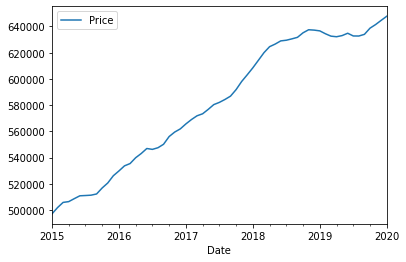

In [165]:
df_AR_LA.plot()

<AxesSubplot:xlabel='Date'>

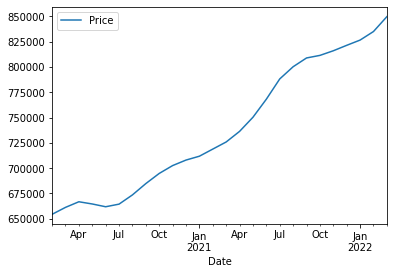

In [166]:
df_AR_test_LA.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

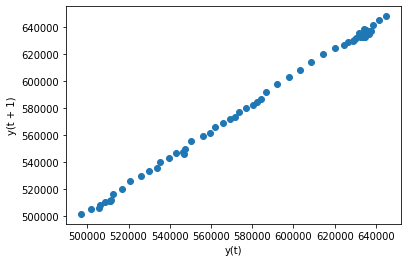

In [167]:
from pandas.plotting import lag_plot
lag_plot(df_AR_LA)

In [168]:
from scipy.stats import pearsonr

a = df_AR_LA.Price
b = df_AR_LA.Price.shift(1)

pearsonr(a[1:],b[1:])

(0.9991334963821825, 8.679030883079624e-82)

In [442]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_AR_LA['Price'], autolag='AIC')[1]

0.692739575605406

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


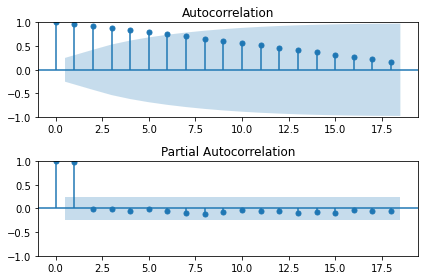

In [169]:
fig, axes = plt.subplots(2,1)

plot_acf(df_AR_LA['Price'],ax = axes[0])
plot_pacf(df_AR_LA['Price'],ax = axes[1])

plt.tight_layout()
plt.show()

In [170]:
train = df_AR_LA
test = df_AR_test_LA

test.index = test.index.to_timestamp()


In [171]:
model_fit = AutoReg(train,lags = 2).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Price   No. Observations:                   61
Model:                     AutoReg(2)   Log Likelihood                -518.548
Method:               Conditional MLE   S.D. of innovations           1587.643
Date:                Fri, 22 Apr 2022   AIC                           1045.095
Time:                        23:21:18   BIC                           1053.406
Sample:                    03-31-2015   HQIC                          1048.339
                         - 01-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3304.3171   2677.044      1.234      0.217   -1942.592    8551.227
Price.L1       1.5952      0.103     15.415      0.000       1.392       1.798
Price.L2      -0.5992      0.102     -5.852      0.000      -0.800      -0.398
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0103           +0.0000j            1.0103            0.0000
AR.2            1.6520           +0.0000j            1.6520            0.0000
-----------------------------------------------------------------------------
"""

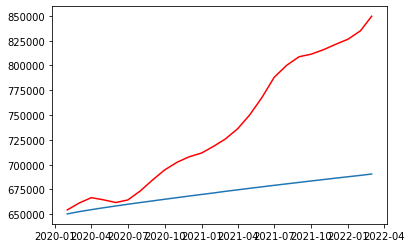

In [172]:
pred = model_fit.predict(start=len(train), end=(len(train)+len(df_AR_test_LA)-1), dynamic=False)
pred.index = pred.index.to_timestamp()
plt.plot(pred)

plt.plot(test,color='r')
plt.show()

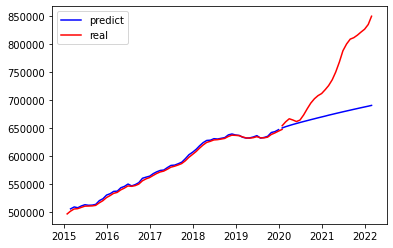

In [179]:
pred2 = model_fit.predict(start=0, end=len(train)-1, dynamic=False)
pred2.index = pred2.index.to_timestamp()
plt.plot(pred2,color='b')
plt.plot(train,color='r')

plt.plot(pred,color = 'b')
plt.plot(test,color='r')
plt.legend(['predict', 'real'])
plt.show()

ARX model

In [348]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [349]:
df_features = pd.read_csv('.\df_after_FINAL1.csv')

In [350]:
df_features.columns

Index(['Unnamed: 0', 'RegionName', 'State', 'Date', 'Price',
       'Housing Inventory', 'UnemploymentRate', 'cases', 'deaths',
       'cases_rate', 'death_rate', 'fully_vaccinated', 'fully_vaccinated_rate',
       'inventory_price_increased', 'inventory_price_decreased',
       'median_days_on_market', 'Population', 'Area', 'GDP', 'GDP_pp',
       'Population_Density', 'Violent_Crimes', 'Violent_Crimes_pp',
       'Property_Crime', 'Property_Crimes_pp', 'Revenue_pp', 'Expenditures_pp',
       'Hospital', 'Hospital_pp', 'School', 'School_pp', 'Public_School',
       'Public_School_pp', 'Private_School', 'Private_School_pp'],
      dtype='object')

In [377]:
df_time = df_features[['RegionName','Date','Price','Housing Inventory','death_rate', 'fully_vaccinated_rate', 'inventory_price_increased']]

In [378]:
df_time = df_time.set_index('Date')

In [379]:
df_time

,RegionName,Price,Housing Inventory,death_rate,fully_vaccinated_rate,inventory_price_increased
Date,,,,,,
2020-02,Los Angeles County,652904,9084,0.000000e+00,0.000000,432
2020-02,San Diego County,611465,4092,0.000000e+00,0.000000,244
2020-02,Orange County,755993,3975,0.000000e+00,0.000000,196
2020-02,Riverside County,402564,6674,0.000000e+00,0.000000,300
2020-02,San Bernardino County,363191,5078,4.509790e-07,0.000000,260
...,...,...,...,...,...,...
2021-12,Mono County,594271,33,0.000000e+00,0.022730,0
2021-12,Trinity County,347825,114,7.488393e-05,0.009186,0
2021-12,Modoc County,163302,43,0.000000e+00,0.005981,0


In [380]:
df_time_LA = df_time[df_time['RegionName'] == 'Los Angeles County']

In [381]:
y = df_time_LA['Price']
x = df_time_LA.drop(columns = ['RegionName','Price'])
x_train_VAR = x[:-4]
x_test_VAR = x[-4:]

y_train_VAR = y[:-4]
y_test_VAR = y[-4:]

In [383]:
y_train_VAR

Date
2020-02    652904
2020-03    659734
2020-04    665278
2020-05    663097
2020-06    660358
2020-07    662938
2020-08    672028
2020-09    683187
2020-10    693188
2020-11    700929
2020-12    706371
2021-01    710177
2021-02    717192
2021-03    724202
2021-04    734634
2021-05    748570
2021-06    766377
2021-07    786335
2021-08    798357
Name: Price, dtype: int64

In [384]:
model_ARX = AutoReg(y_train_VAR,2, exog=x_train_VAR, old_names=False).fit()
model_ARX.summary()

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Price   No. Observations:                   19
Model:                   AutoReg-X(2)   Log Likelihood                -151.994
Method:               Conditional MLE   S.D. of innovations           1848.041
Date:                Sat, 23 Apr 2022   AIC                            319.988
Time:                        16:06:30   BIC                            326.654
Sample:                    04-01-2020   HQIC                           320.650
                         - 08-01-2021                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.049e+05   2.96e+04      3.542      0.000    4.69e+04    1.63e+05
Price.L1                      1.6702      0.139     11.979      0.000       1.397       1.943
Price.L2                     -0.7857      0.166     -4.727      0.000      -1.111      -0.460
Housing Inventory            -4.3155      1.046     -4.124      0.000      -6.366      -2.265
death_rate                -8.622e+06    3.8e+06     -2.270      0.023   -1.61e+07   -1.18e+06
fully_vaccinated_rate     -7.674e+04   2.38e+04     -3.218      0.001   -1.23e+05      -3e+04
inventory_price_increased    40.1292      7.148      5.614      0.000      26.120      54.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0629           -0.3782j            1.1282           -0.0544
AR.2            1.0629           +0.3782j            1.1282            0.0544
-----------------------------------------------------------------------------
"""

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


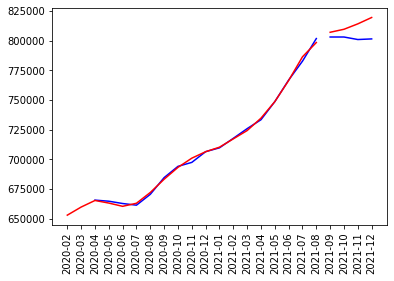

In [385]:
pred3 = model_ARX.predict(start='2021-09', end='2021-12', dynamic=False,exog_oos=x_test_VAR)
pred3.index = pred3.index.strftime('%Y-%m')

pred4 = model_ARX.predict(start='2020-02', end='2021-08', dynamic=False)
pred4.index = pred4.index.strftime('%Y-%m')

plt.plot(pred4,color='b')
plt.plot(y_train_VAR,color='r')

plt.plot(pred3,color='b')
plt.plot(y_test_VAR,color='r')
plt.xticks(rotation = 90)

plt.show()

In [392]:
df_time2 = df_features[['RegionName','Date','Price','Housing Inventory', 'inventory_price_increased']]

In [393]:
df_time2 = df_time2.set_index('Date')

In [394]:
df_time_LA2 = df_time2[df_time2['RegionName'] == 'Los Angeles County']

In [395]:
y2 = df_time_LA2['Price']
x2 = df_time_LA2.drop(columns = ['RegionName','Price'])

In [396]:
x_train_VAR2 = x2[:-4]
x_test_VAR2 = x2[-4:]

y_train_VAR2 = y2[:-4]
y_test_VAR2 = y2[-4:]

In [397]:
model_ARX2 = AutoReg(y_train_VAR2,2, exog=x_train_VAR2, old_names=False).fit()
model_ARX2.summary()

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Price   No. Observations:                   19
Model:                   AutoReg-X(2)   Log Likelihood                -156.115
Method:               Conditional MLE   S.D. of innovations           2355.064
Date:                Sat, 23 Apr 2022   AIC                            324.231
Time:                        22:26:50   BIC                            329.230
Sample:                    04-01-2020   HQIC                           324.728
                         - 08-01-2021                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      6.394e+04   3.39e+04      1.884      0.060   -2583.010     1.3e+05
Price.L1                      1.7724      0.171     10.370      0.000       1.437       2.107
Price.L2                     -0.8674      0.206     -4.210      0.000      -1.271      -0.464
Housing Inventory            -1.4895      0.745     -2.000      0.046      -2.949      -0.030
inventory_price_increased    33.1882      7.233      4.588      0.000      19.011      47.365
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0217           -0.3302j            1.0737           -0.0498
AR.2            1.0217           +0.3302j            1.0737            0.0498
-----------------------------------------------------------------------------
"""

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


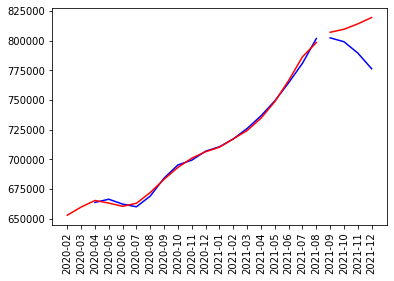

In [398]:
pred5 = model_ARX2.predict(start='2021-09', end='2021-12', dynamic=False,exog_oos=x_test_VAR2)
pred5.index = pred5.index.strftime('%Y-%m')

pred6 = model_ARX2.predict(start='2020-02', end='2021-08', dynamic=False)
pred6.index = pred6.index.strftime('%Y-%m')

plt.plot(pred6,color='b')
plt.plot(y_train_VAR2,color='r')

plt.plot(pred5,color='b')
plt.plot(y_test_VAR2,color='r')
plt.xticks(rotation = 90)

plt.show()

VAX with the data before

In [400]:
df_before = pd.read_csv('./df_before.csv')
df_before = df_before.drop(columns = ['Unnamed: 0','State_x','cases','deaths','cases_rate','death_rate','fully_vaccinated','fully_vaccinated_rate'])
df_before.head()

,RegionName,Date,Price,Housing Inventory,UnemploymentRate
0,Los Angeles County,2018-01,607070.0,9337.0,4.9
1,San Diego County,2018-01,574762.0,4367.0,3.7
2,Orange County,2018-01,722234.0,3839.0,3.3
3,Riverside County,2018-01,366823.0,7581.0,4.8
4,San Bernardino County,2018-01,330742.0,5844.0,4.5


In [402]:
df_before_add = pd.read_csv('./Housing_inventory_plus.csv')
df_before_add = df_before_add.drop(columns=['Unnamed: 0'])
df_before_add.head()

,Date,County,inventory_price_increased,inventory_price_decreased,median_days_on_market
0,2021-12,Modoc County,0.0,0.0,77.0
1,2021-12,Ventura County,40.0,64.0,42.0
2,2021-12,Riverside County,256.0,572.0,42.0
3,2021-12,Kern County,76.0,200.0,40.0
4,2021-12,Contra Costa County,32.0,80.0,38.0


In [404]:
df_before = df_before.merge(df_before_add, how = 'left', left_on = ['RegionName','Date'], right_on = ['County','Date'])

In [405]:
df_before = df_before.drop(columns = 'County')
df_before

,RegionName,Date,Price,Housing Inventory,UnemploymentRate,inventory_price_increased,inventory_price_decreased,median_days_on_market
0,Los Angeles County,2018-01,607070.0,9337.0,4.9,640.0,2228.0,47.0
1,San Diego County,2018-01,574762.0,4367.0,3.7,136.0,1148.0,41.0
2,Orange County,2018-01,722234.0,3839.0,3.3,224.0,1324.0,47.0
3,Riverside County,2018-01,366823.0,7581.0,4.8,384.0,2480.0,59.0
4,San Bernardino County,2018-01,330742.0,5844.0,4.5,368.0,1624.0,60.0
...,...,...,...,...,...,...,...,...
1445,Mono County,2020-01,474227.0,161.0,3.6,0.0,20.0,129.0
1446,Trinity County,2020-01,282224.0,173.0,7.0,0.0,16.0,135.0
1447,Modoc County,2020-01,136002.0,74.0,10.1,0.0,12.0,159.0
1448,Sierra County,2020-01,248989.0,28.0,6.4,0.0,0.0,191.0


In [406]:
df_before_LA = df_before[df_before['RegionName']=='Los Angeles County']
df_before_LA = df_before_LA.set_index('Date')

,RegionName,Date,Price,Housing Inventory,UnemploymentRate,inventory_price_increased,inventory_price_decreased,median_days_on_market
0,Los Angeles County,2018-01,607070.0,9337.0,4.9,640.0,2228.0,47.0
58,Los Angeles County,2018-02,612831.0,10204.0,4.7,708.0,2688.0,30.0
116,Los Angeles County,2018-03,618617.0,10547.0,4.5,984.0,3008.0,32.0
174,Los Angeles County,2018-04,623156.0,11363.0,4.3,1012.0,3252.0,33.0
232,Los Angeles County,2018-05,625140.0,12102.0,4.1,1096.0,3780.0,31.0
290,Los Angeles County,2018-06,627566.0,13277.0,4.8,1072.0,4420.0,33.0
348,Los Angeles County,2018-07,628080.0,14273.0,5.1,1012.0,4980.0,36.0
406,Los Angeles County,2018-08,629113.0,15033.0,5.1,1732.0,6292.0,37.0
464,Los Angeles County,2018-09,630276.0,15797.0,4.6,1604.0,6680.0,39.0
522,Los Angeles County,2018-10,633729.0,16456.0,4.5,1484.0,7100.0,40.0


In [423]:
df_before_test = df_features[['RegionName','Date','Price','Housing Inventory','UnemploymentRate', 'inventory_price_increased', 'inventory_price_decreased',
       'median_days_on_market']]
df_before_test = df_before_test[df_before_test['RegionName'] == 'Los Angeles County']
df_before_test = df_before_test.set_index('Date')

In [427]:
y_before = df_before_LA['Price']
x_before = df_before_LA.drop(columns = ['RegionName','Price'])
x_train_before = x_before
x_test_before = df_before_test.drop(columns = ['RegionName','Price'])

y_train_before = y_before
y_test_before = df_before_test['Price']

In [439]:
model_ARX_before = AutoReg(y_train_before,2, exog=x_train_before, old_names=False).fit()
model_ARX_before.summary()

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Price   No. Observations:                   25
Model:                   AutoReg-X(2)   Log Likelihood                -194.284
Method:               Conditional MLE   S.D. of innovations           1127.996
Date:                Sat, 23 Apr 2022   AIC                            406.568
Time:                        22:51:34   BIC                            416.788
Sample:                    03-01-2018   HQIC                           409.138
                         - 01-01-2020                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.856e+05   5.41e+04      3.433      0.001    7.97e+04    2.92e+05
Price.L1                      1.1889      0.169      7.039      0.000       0.858       1.520
Price.L2                     -0.4661      0.134     -3.483      0.000      -0.728      -0.204
Housing Inventory            -1.2761      0.481     -2.651      0.008      -2.220      -0.332
UnemploymentRate          -2156.8778    809.832     -2.663      0.008   -3744.119    -569.636
inventory_price_increased    -3.7800      1.604     -2.357      0.018      -6.923      -0.636
inventory_price_decreased     2.7827      0.961      2.897      0.004       0.900       4.665
median_days_on_market       193.9567     69.208      2.803      0.005      58.311     329.602
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2755           -0.7202j            1.4648           -0.0818
AR.2            1.2755           +0.7202j            1.4648            0.0818
-----------------------------------------------------------------------------
"""

D:\Anaconda\envs\py37\lib\site-packages\statsmodels\tsa\deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


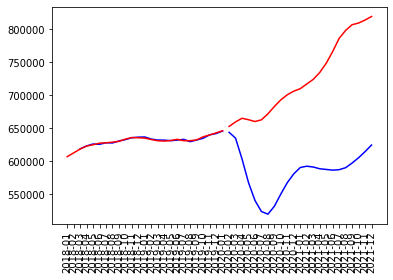

In [440]:
pred_before = model_ARX_before.predict(start='2020-02', end='2021-12', dynamic=False,exog_oos=x_test_before)
pred_before.index = pred_before.index.strftime('%Y-%m')

pred_before2 = model_ARX_before.predict(start='2018-01', end='2020-01', dynamic=False)
pred_before2.index = pred_before2.index.strftime('%Y-%m')

plt.plot(pred_before2,color='b')
plt.plot(y_train_before,color='r')

plt.plot(pred_before,color='b')
plt.plot(y_test_before,color='r')
plt.xticks(rotation = 90)

plt.show()